# Data Mining Project - Kickstarter Projects

## Nadav Kiani & Daniel Dimant

### Structure
1. Import libraries and loading data
2. Initial Exploration
3. Visualization data
4. Preprocessing
5. Preparing for modelling
6. Build models

## Introduction:

In this Data Mining project, we will try to build a machine-learning model that will successfully classify kickstarter projects to whether they would succes or fail.

Understanding Variables in the Dataset:

The dataset has 15 variablesincluding ID. Variables like name, currency, deadline, launched date and country as self explanatory. Explanations of some key variables are as follows:

Main_Category: There are 15 main categories for the project. These main categories broadly classify projects based on topic and genre they belong to.

Category: Main Categories are further sub divided in categories to give more general idea of the project. For example, Main Category “Technology” has 15 categories like Gadgets, Web, Apps, Software etc. There are 159 total categories.

Goal: This is the goal amount which the company need to raise to start its project. The goal amount is important variable for company as if it is too high, the project may fail to raise that amount of money and be unsuccessful. If it is too low, then it may reach its goal soon and backers may not be interested to pledge more.

Pledged: This is amount raised by the company through its backers. On Kickstarter, if total amount pledged is lower than goal, then the project is unsuccessful and the start-up company doesn’t receive any fund. If pledged amount is more than the goal, the company is considered successful. The variable “usd pledged” is amount of money raised in US dollars.

Number of Backers: These are number of people who have supported the project by pledging some amount.


## 1. Import libraries and loading data
***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
df = pd.read_csv('ks-projects-201801.csv')

## 2. Initial Exploration

In [63]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


We can see that the minimum pledged amount is 0 USD and the maximum is over 20 million.

In [5]:
print(df.shape)
print(df.info())

(378661, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB
None


In [6]:
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

We can see that there are only 2 columns that have missing data. In the 'name' columns we will remove the 4 projects who do not have a name. 

'usd_pledged' columns contains 3797 null values which is only around 1% of our data, so we would have dropped the missing values, but since we will use the 'usd_pledged_real', we will remove this column entirely (and 'pledged'/'goal' column as well for reasons mentioned in our introduction).



***

In [64]:
df = df.drop(['pledged'],axis=1)
df = df.drop(['usd_pledged_real'],axis=1)
df = df.drop(['usd pledged'],axis=1)
df = df.drop(['goal'],axis=1)
df.dropna(subset = ['name'], inplace = True)

In [8]:
df.head()

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,0,GB,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,15,US,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,3,US,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,1,US,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,canceled,14,US,19500.00


In [9]:
df.isnull().sum()

ID               0
name             0
category         0
main_category    0
currency         0
deadline         0
launched         0
state            0
backers          0
country          0
usd_goal_real    0
dtype: int64

Now we can see there are no more missing values

## 3. Visualization

The 'category' and 'main_category' features are distinct but have a lot of overlap. However, the 'category' feature is much more diverse. Both can be useful for our analysis.

Categories in category:  159


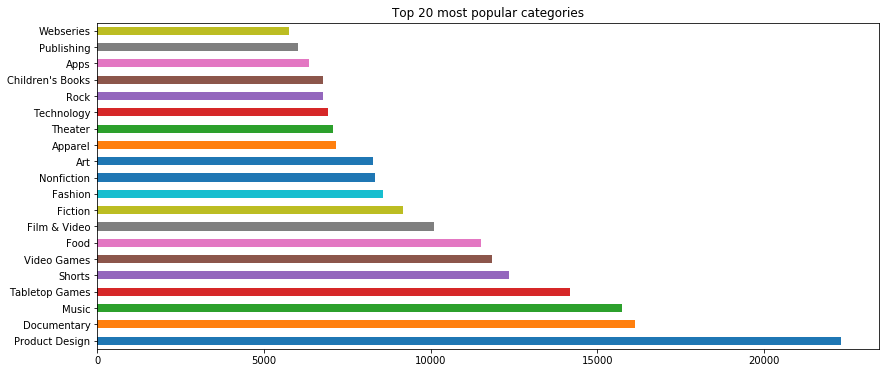

In [10]:
print('Categories in category: ', df['category'].nunique())
df['category'].value_counts()[:20].plot(kind='barh', 
                                        figsize=(14,6), 
                                        title='Top 20 most popular categories')

Categories in main_category:  15


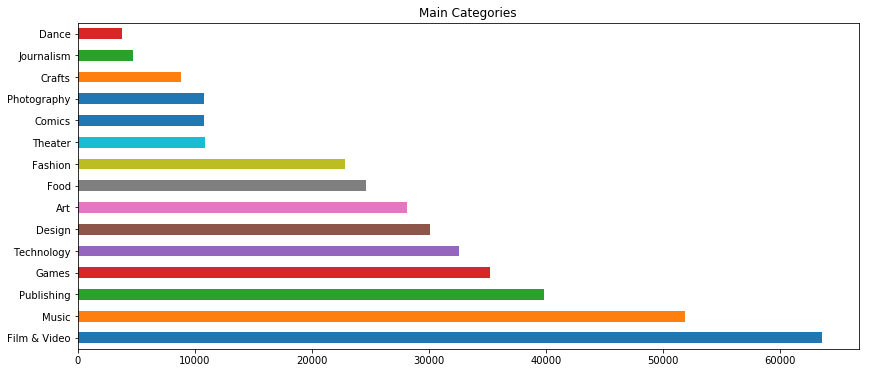

In [11]:
print('Categories in main_category: ', df['main_category'].nunique())
df['main_category'].value_counts().plot(kind='barh', 
                                        figsize=(14,6), 
                                        title='Main Categories')

Number of unique countries:  23


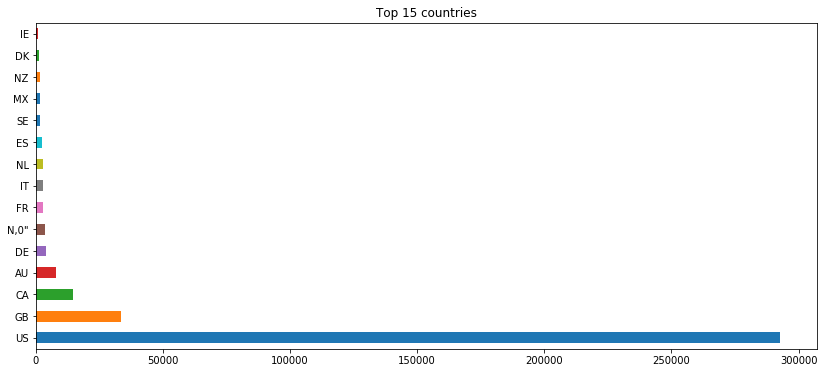

In [12]:
print('Number of unique countries: ', df['country'].nunique())
df['country'].value_counts()[:15].plot(kind='barh', 
                                       figsize=(14,6), 
                                       title='Top 15 countries')

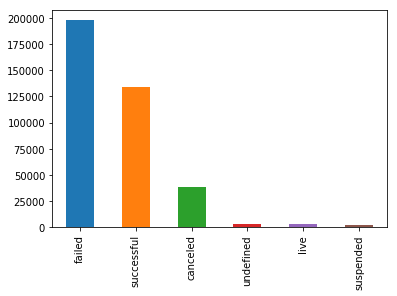

In [13]:
df['state'].value_counts().plot.bar()
plt.show()

In [14]:
percentual_sucess = round(df["state"].value_counts() / len(df["state"]) * 100,2)
print("State Percentual in %: ")
print(percentual_sucess)

State Percentual in %: 
failed        52.22
successful    35.38
canceled      10.24
undefined      0.94
live           0.74
suspended      0.49
Name: state, dtype: float64


We will only predict whether a project succeeded or failed, so we will drop any other outcome

In [65]:
df = df[~df['state'].isin(['live','undefined','suspended','canceled'])]

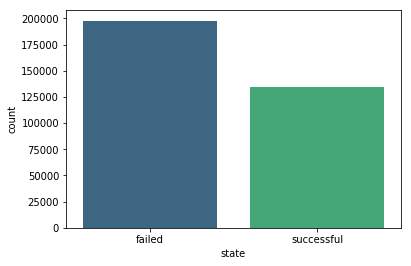

In [16]:
sns.countplot(data=df, x='state', palette='viridis')

***

## 4. Preprocessing

In [66]:
# Select only projects with goals greater than 10000
df = df[df.usd_goal_real > 1000]

In [67]:
# create a dataframe with projects that have 1 or more backers
df = df[(df.backers >= 1)]

In [68]:
df.shape

(244633, 11)

backers             AxesSubplot(0.125,0.657941;0.227941x0.222059)
usd_goal_real    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
dtype: object

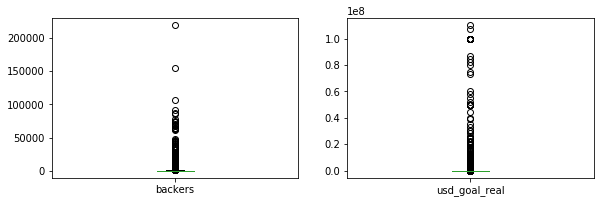

In [69]:
# box and whisker plot (Univariate Plots)
# with this we can determine outliers in dataset
X = df.loc[:,'backers':'usd_goal_real']
X.drop('country', axis=1,inplace = True )
X.plot(kind='box',subplots=True,layout=(3,3),figsize=(15,10))

In [70]:
X.describe()

,backers,usd_goal_real
count,244633.000000,2.446330e+05
mean,151.879640,4.188340e+04
std,1120.833063,1.021310e+06
min,1.000000,1.000460e+03
25%,5.000000,3.500000e+03
50%,27.000000,7.500000e+03
75%,88.000000,1.950000e+04
max,219382.000000,1.101698e+08


We can see in the boxplots that there are outliers in the data, hence we will remove those that are above and below 3 STD's from the mean value.

In [71]:
df = df[(df['usd_goal_real'] > (df['usd_goal_real'].mean() - 3*df['usd_goal_real'].std()))]
df = df[(df['usd_goal_real'] < (df['usd_goal_real'].mean() + 3*df['usd_goal_real'].std()))]
df = df[(df['backers'] > (df['backers'].mean() - 3*df['backers'].std()))]
df = df[(df['backers'] < (df['backers'].mean() + 3*df['backers'].std()))]

backers             AxesSubplot(0.125,0.657941;0.227941x0.222059)
usd_goal_real    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
dtype: object

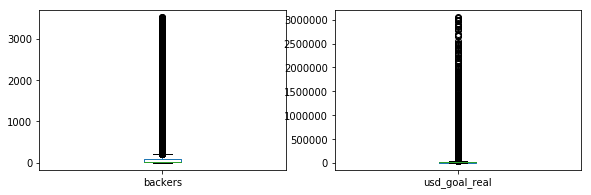

In [72]:
X = df.loc[:,'backers':'usd_goal_real']
X.drop('country', axis=1,inplace = True )
X.plot(kind='box',subplots=True,layout=(3,3),figsize=(15,10))

In [73]:
X.describe()

,backers,usd_goal_real
count,243171.000000,2.431710e+05
mean,106.573860,2.357243e+04
std,275.918382,9.056492e+04
min,1.000000,1.000460e+03
25%,5.000000,3.428710e+03
50%,26.000000,7.500000e+03
75%,87.000000,1.883508e+04
max,3515.000000,3.051478e+06


We can see that in both columns, the mean and the STD have significent decline.

In [74]:
# Create new column
# 'duration_days' = 'deadline' - 'launched'

df['launched'] = pd.to_datetime(df['launched'])
df['deadline'] = pd.to_datetime(df['deadline'])

df['duration_days']=(df['deadline']-df['launched']).dt.days

In [45]:
df.head()

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_goal_real,duration_days
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,15,US,30000.0,59
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,3,US,45000.0,44
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,1,US,5000.0,29
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,2016-02-26 13:38:27,successful,224,US,50000.0,34
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,2016-02-01 20:05:12,failed,40,US,25000.0,44


In [75]:
# Mapping 'state' column to a numeric type for modeling
df['state'] = df['state'].map({
        'failed': 0,
        'successful': 1         
})

In [76]:
# Create two new columns: launched month and launched week
df["launched_month"] = df["launched"].dt.month
df["launched_week"] = df["launched"].dt.week

(6000, 14112.0)

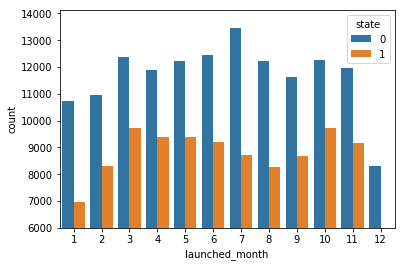

In [77]:
# Number of projects launched each month, with reference to the state
sns.countplot(data= df , x = 'launched_month', hue = 'state' )
plt.ylim(6000)

We will drop columns which will not be used for our model.

In [78]:
df = df.drop(["ID", "name","launched", "deadline","launched_week","category","currency"], axis = 1)

In [79]:
df.head()

,main_category,state,backers,country,usd_goal_real,duration_days,launched_month
1,Film & Video,0,15,US,30000.0,59,9
2,Film & Video,0,3,US,45000.0,44,1
3,Music,0,1,US,5000.0,29,3
5,Food,1,224,US,50000.0,34,2
7,Food,0,40,US,25000.0,44,2


***

## 5. Preparing for modelling

In [80]:
df['country'].value_counts()

US    193713
GB     20377
CA      8653
AU      4630
DE      2549
FR      1919
NL      1742
IT      1677
ES      1298
SE      1106
MX       925
NZ       910
DK       645
CH       526
IE       515
NO       410
BE       399
AT       387
HK       383
SG       344
LU        45
JP        18
Name: country, dtype: int64

We can see that most of the projects are based in the US, hence we will use Pareto - around 80% of the data will remain 'US' and the rest will be replaced to 'Other' value

In [81]:
countries = list(df["country"].unique())
print(countries)

['US', 'GB', 'AU', 'CA', 'IT', 'DE', 'IE', 'MX', 'FR', 'NZ', 'CH', 'AT', 'SE', 'NO', 'BE', 'DK', 'HK', 'ES', 'NL', 'LU', 'SG', 'JP']


In [82]:
countries.remove('US')

In [83]:
df['country'] = df['country'].replace(countries,'Other')

In [84]:
print("Percentage of countries after Pareto")
round(df['country'].value_counts()  / len(df["country"]) * 100,2) 

Percentage of countries after Pareto


US       79.66
Other    20.34
Name: country, dtype: float64

***

We will now use Pareto for the 'main_category' column

In [85]:
main_categories = list(df["main_category"].unique())
print(main_categories)

['Film & Video', 'Music', 'Food', 'Games', 'Design', 'Comics', 'Publishing', 'Fashion', 'Theater', 'Art', 'Photography', 'Crafts', 'Technology', 'Journalism', 'Dance']


In [86]:
percentual_main_categories = round(df["main_category"].value_counts() / len(df["main_category"]) * 100,2)
print("Main Categories in %: ")
print(percentual_main_categories)

Main Categories in %: 
Film & Video    17.51
Music           13.72
Publishing      10.30
Games            9.22
Design           8.73
Technology       8.67
Food             6.92
Art              6.53
Fashion          5.56
Theater          3.18
Comics           3.05
Photography      2.69
Crafts           1.70
Dance            1.17
Journalism       1.07
Name: main_category, dtype: float64


In [87]:
main_categories = [e for e in main_categories if e not in ('Film & Video', 'Technology','Design', 'Games', 'Food', 'Music')]

In [88]:
print(main_categories)

['Comics', 'Publishing', 'Fashion', 'Theater', 'Art', 'Photography', 'Crafts', 'Journalism', 'Dance']


In [90]:
df['main_category'] = df['main_category'].replace(main_categories,'Other')
df['main_category'].value_counts()

Other           85716
Film & Video    42570
Music           33352
Games           22413
Design          21227
Technology      21076
Food            16817
Name: main_category, dtype: int64

***

We will now prepare the dataset for modeling by using encoding method for the categorial features. Encoding converts each class under specified feature to a numerical value.

In [91]:
# We use one-hot-codding
df2 = df.copy()
df2 = pd.get_dummies(df2, columns = ['main_category'])

In [92]:
df2.head()

,state,backers,country,usd_goal_real,duration_days,launched_month,main_category_Design,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Music,main_category_Other,main_category_Technology
1,0,15,US,30000.0,59,9,0,1,0,0,0,0,0
2,0,3,US,45000.0,44,1,0,1,0,0,0,0,0
3,0,1,US,5000.0,29,3,0,0,0,0,1,0,0
5,1,224,US,50000.0,34,2,0,0,1,0,0,0,0
7,0,40,US,25000.0,44,2,0,0,1,0,0,0,0


In [93]:
# Mapping country column
df2['country'] = df2['country'].map({
        'Other': 0,
        'US': 1         
})

In [94]:
df2.head()

,state,backers,country,usd_goal_real,duration_days,launched_month,main_category_Design,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Music,main_category_Other,main_category_Technology
1,0,15,1,30000.0,59,9,0,1,0,0,0,0,0
2,0,3,1,45000.0,44,1,0,1,0,0,0,0,0
3,0,1,1,5000.0,29,3,0,0,0,0,1,0,0
5,1,224,1,50000.0,34,2,0,0,1,0,0,0,0
7,0,40,1,25000.0,44,2,0,0,1,0,0,0,0


Now the dataset is ready for modeling!

##  6. Building the models

First, we will split the data into 2 subsets in this form: <br>
    1. 80% - Train Data 
    2. 20% - Test Data

Then we will use 3 classification algorithms to make predictions: <br>
    1. Logistic Regression
    2. Decision Tree
    3. Random Forest 
In order to evaluate our models we will use 2 metrics:
    1. Confusion Matrix
    2. Accuracy

***

Before we start, we will create a function that will help us generate confusion matrix easily:

In [195]:
import itertools

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    cm=np.array(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True values')
    plt.xlabel('Predicted values')
    plt.tight_layout()

In [196]:
y  = df2["state"]
x =  df2.drop("state",axis=1)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=5)

print("Original size was", x.shape[0])
print("x_train", x_train.shape[0])
print("x_test", x_test.shape[0])

Original size was 243171
x_train 194536
x_test 48635


In [197]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(194536, 12) (194536,)
(48635, 12) (48635,)


We will start withour first algorithm - logistic regression:

In [198]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
# Fit the model.
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [199]:
# Perform 5-Fold cross-validation
from sklearn.model_selection import cross_val_score
scoring = 'accuracy'
results = cross_val_score(lr, x, y, cv=5, scoring=scoring)
print("Accuracy:") 
results.mean()

Accuracy:


0.9066582940775471

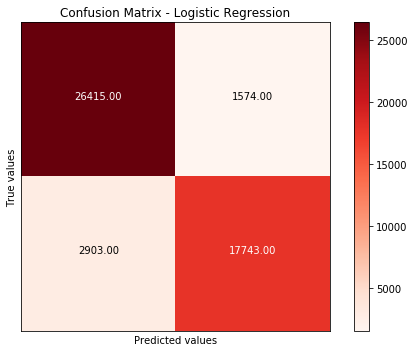

In [212]:
lr_pred = lr.predict(x_test)
cm = confusion_matrix(y_test, lr_pred)

plt.figure(figsize=(7, 5))
plot_confusion_matrix(cm, classes='',
                      title='Confusion Matrix - Logistic Regression')
plt.show()

Now, we will continue with the second algorithm - Decision Tree Classifier:

In [201]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
dtree_predictions = decision_tree.predict(x_test)

scoring = 'accuracy'
results = cross_val_score(decision_tree, x, y, cv=5, scoring=scoring)
print("Accuracy:") 
results.mean()

Accuracy:


0.8875811637004686

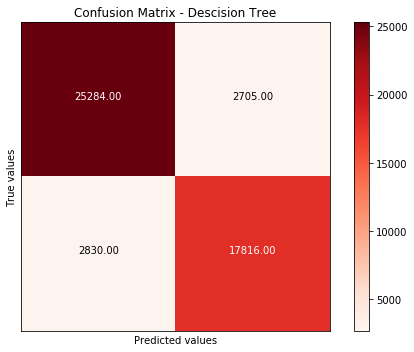

In [214]:
dtree_pred = decision_tree.predict(x_test)
cm = confusion_matrix(y_test, dtree_pred)

plt.figure(figsize=(7, 5))
plot_confusion_matrix(cm, classes='',
                      title='Confusion Matrix - Descision Tree')
plt.show()

And last but not least, Random Forest Classifier:

In [203]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

scoring = 'accuracy'
results = cross_val_score(random_forest, x, y, cv=5, scoring=scoring)
print("Accuracy:") 
results.mean()

Accuracy:


0.9179014048760532

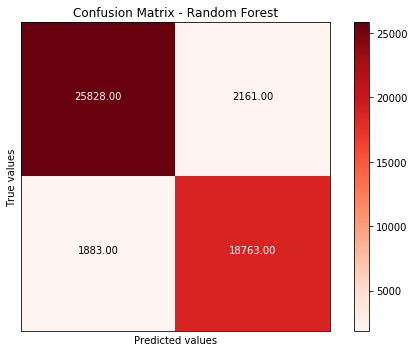

In [215]:
random_forest_pred = random_forest.predict(x_test)
cm = confusion_matrix(y_test, random_forest_pred)

plt.figure(figsize=(7, 5))
plot_confusion_matrix(cm, classes='',
                      title='Confusion Matrix - Random Forest')
plt.show()

Now, after performing all the 3 algorithms, we will now use ROC curve in order to compare between the models.

***

In [205]:
from sklearn.metrics import roc_curve, auc

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_pred)
lr_roc_auc = auc(lr_fpr, lr_tpr)

rf_fpr, rf_tpr, _ = roc_curve(y_test, random_forest_pred)
rf_roc_auc = auc(rf_fpr, rf_tpr)

dt_fpr, dt_tpr, _ = roc_curve(y_test, dtree_pred)
dt_roc_auc = auc(dt_fpr, dt_tpr)

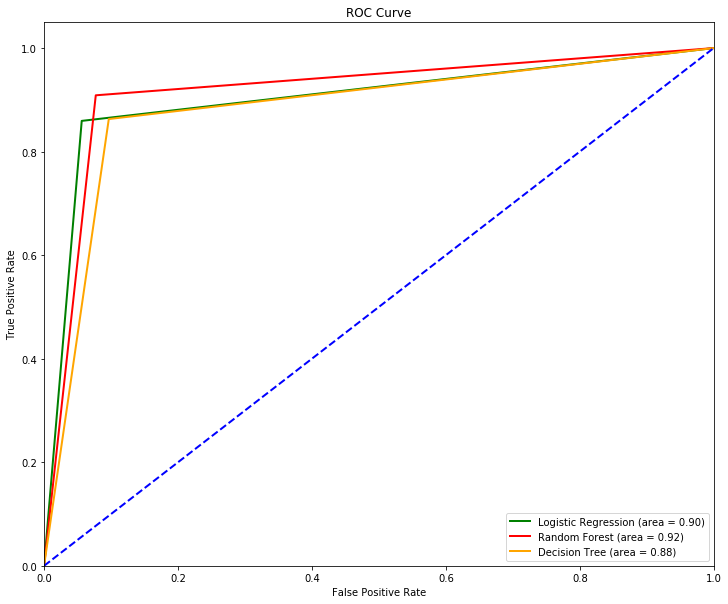

In [210]:
plt.figure(figsize=(12, 10))
plt.plot(lr_fpr, lr_tpr, color='green',
         lw=2, label='Logistic Regression (area = %0.2f)' % lr_roc_auc)
plt.plot(rf_fpr, rf_tpr, color='red',
         lw=2, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(dt_fpr, dt_tpr, color='orange',
         lw=2, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

***

## 7. Conclusion

We can see that the Random Forest perform best. We can see it both in the ROC curve and the accuracy metric.